In [1]:
import scipy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')

# SVD

In [4]:
def np_svd(X):
    U, Sigma, Vh = np.linalg.svd(X,full_matrices=True,compute_uv=True)
    return U, Sigma, Vh

In [5]:
def scipy_svd(X):
    U, Sigma, Vh = scipy.linalg.svd(X,full_matrices=True,compute_uv=True)
    return U, Sigma, Vh

In [6]:
def scipy_gesvd(X):
    U, Sigma, Vh = scipy.linalg.svd(X,
                                    full_matrices=True,
                                    compute_uv=True,
                                    lapack_driver='gesvd'
                                )
    return U, Sigma, Vh

In [7]:
from time import time

def time_func(func, n_trials, *args, **kwargs):
    times = []
    for i in range(n_trials):
        t0 = time()
        res = func(*args, **kwargs)
        tt = time()
        t = tt - t0
        times.append(t)
    return np.asarray(times)

def time_svd_funcs(funcs, Ns=[200, 500, 1000, 2000], n_trials=4):
    results = []
    for N in Ns:
        X=np.random.rand(N,N)
        for func in funcs:
            times = time_func(func, n_trials, X)
            
            results.extend([{
                'time': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in times])
    return pd.DataFrame(results)

In [8]:
results1 = time_svd_funcs([np_svd, scipy_svd, scipy_gesvd], 
                         Ns=[100,200,300,400,500,600,700,800,900,1000]
                        )

In [150]:
results1.groupby(['N', 'func_name']).agg([np.mean, np.std])

time          
                      mean       std
N    func_name                      
100  np_svd       0.008784  0.009507
     scipy_gesvd  0.018140  0.001694
     scipy_svd    0.012987  0.010323
200  np_svd       0.030509  0.003867
     scipy_gesvd  0.057421  0.004020
     scipy_svd    0.028477  0.001016
300  np_svd       0.042570  0.015915
     scipy_gesvd  0.167098  0.002123
     scipy_svd    0.043048  0.012894
400  np_svd       0.064424  0.003176
     scipy_gesvd  0.323157  0.003109
     scipy_svd    0.076110  0.027926
500  np_svd       0.107477  0.002701
     scipy_gesvd  0.543536  0.007627
     scipy_svd    0.120859  0.029607
600  np_svd       0.174104  0.003728
     scipy_gesvd  0.907309  0.006023
     scipy_svd    0.187179  0.028282
700  np_svd       0.264472  0.008277
     scipy_gesvd  1.333437  0.093693
     scipy_svd    0.279574  0.014870
800  np_svd       0.369526  0.015021
     scipy_gesvd  2.040285  0.008398
     scipy_svd    0.395934  0.017905
900  np_svd       0.516449  0.009098
     scipy_gesvd  2.853727  0.019025
     scipy_svd    0.537257  0.020852
1000 np_svd       0.665216  0.014137
     scipy_gesvd  3.763049  0.527240
     scipy_svd    0.724497  0.019926

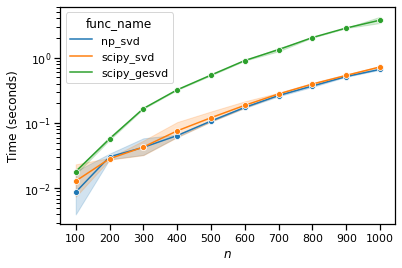

In [151]:
ax = sns.lineplot(x='N', y='time', hue='func_name',
                  marker='o',
                  data=results1)
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

In [12]:
def Error_func(func, n_trials,X,N):
    Error1= []
    Error2= []
    Error3= []
    print(func.__name__)
    for i in range(n_trials):
      U, sigma, Vt = func(X)
      sigma = np.diag(sigma)
      a4=np.dot(np.dot(U, sigma), Vt)
      Error1.append(mean_absolute_error(X,a4))
      Error2.append(mean_squared_error(X,a4))
      Error3.append(r2_score(X,a4))
    return np.asarray(Error1),np.asarray(Error2),np.asarray(Error3)

def Error_svd_funcs(funcs, Ns=[100,200,300,400,500,600,700,800,900,1000], n_trials=4):
    results1 = []
    results2=[]
    results3=[]
    for N in Ns:
        X=np.random.rand(N,N)
        for func in funcs:
            t1,t2,t4 = Error_func(func, n_trials, X,N)
            results1.extend([{
                'Mean Absolute Error': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t1])
            results2.extend([{
                'Mean Squared Error': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t2])
            results3.extend([{
                'r2 score': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t4])
            
    return pd.DataFrame(results1),pd.DataFrame(results2),pd.DataFrame(results3)

In [33]:
Error_results11,Error_results12,Error_results13 = Error_svd_funcs([np_svd, scipy_svd, scipy_gesvd], 
                                                  Ns=[100,200,300,400,500,600,700,800,900,1000]
                                                  )

np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd
np_svd
scipy_svd
scipy_gesvd


In [152]:
Error_results11.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Absolute Error     
                                mean  std
N    func_name                           
100  np_svd             6.212374e-16  0.0
     scipy_gesvd        9.848502e-16  0.0
     scipy_svd          5.803830e-16  0.0
200  np_svd             7.988957e-16  0.0
     scipy_gesvd        1.198859e-15  0.0
     scipy_svd          7.654988e-16  0.0
300  np_svd             7.317031e-16  0.0
     scipy_gesvd        1.434781e-15  0.0
     scipy_svd          7.173420e-16  0.0
400  np_svd             1.504870e-15  0.0
     scipy_gesvd        2.091780e-15  0.0
     scipy_svd          1.507345e-15  0.0
500  np_svd             8.566730e-16  0.0
     scipy_gesvd        1.732865e-15  0.0
     scipy_svd          8.352035e-16  0.0
600  np_svd             8.878091e-16  0.0
     scipy_gesvd        1.970411e-15  0.0
     scipy_svd          8.928715e-16  0.0
700  np_svd             1.094007e-15  0.0
     scipy_gesvd        2.027133e-15  0.0
     scipy_svd          1.091542e-15  0.0
800  np_svd             9.991100e-16  0.0
     scipy_gesvd        2.102932e-15  0.0
     scipy_svd          9.811871e-16  0.0
900  np_svd             9.212979e-16  0.0
     scipy_gesvd        2.288454e-15  0.0
     scipy_svd          9.091464e-16  0.0
1000 np_svd             9.780173e-16  0.0
     scipy_gesvd        2.383482e-15  0.0
     scipy_svd          9.893995e-16  0.0

In [153]:
Error_results12.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Squared Error     
                               mean  std
N    func_name                          
100  np_svd            6.610648e-31  0.0
     scipy_gesvd       1.562913e-30  0.0
     scipy_svd         5.783383e-31  0.0
200  np_svd            1.047197e-30  0.0
     scipy_gesvd       2.282326e-30  0.0
     scipy_svd         9.480807e-31  0.0
300  np_svd            8.944048e-31  0.0
     scipy_gesvd       3.269606e-30  0.0
     scipy_svd         8.477762e-31  0.0
400  np_svd            3.757638e-30  0.0
     scipy_gesvd       7.051988e-30  0.0
     scipy_svd         3.758875e-30  0.0
500  np_svd            1.217197e-30  0.0
     scipy_gesvd       4.771595e-30  0.0
     scipy_svd         1.173380e-30  0.0
600  np_svd            1.334665e-30  0.0
     scipy_gesvd       6.159182e-30  0.0
     scipy_svd         1.337645e-30  0.0
700  np_svd            2.004985e-30  0.0
     scipy_gesvd       6.489638e-30  0.0
     scipy_svd         2.005073e-30  0.0
800  np_svd            1.661732e-30  0.0
     scipy_gesvd       7.015813e-30  0.0
     scipy_svd         1.618051e-30  0.0
900  np_svd            1.419437e-30  0.0
     scipy_gesvd       8.281922e-30  0.0
     scipy_svd         1.380187e-30  0.0
1000 np_svd            1.658927e-30  0.0
     scipy_gesvd       8.996637e-30  0.0
     scipy_svd         1.688520e-30  0.0

In [154]:
Error_results13.groupby(['N', 'func_name']).agg([np.mean, np.std])

r2 score     
                     mean  std
N    func_name                
100  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
200  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
300  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
400  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
500  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
600  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
700  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
800  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
900  np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0
1000 np_svd           1.0  0.0
     scipy_gesvd      1.0  0.0
     scipy_svd        1.0  0.0

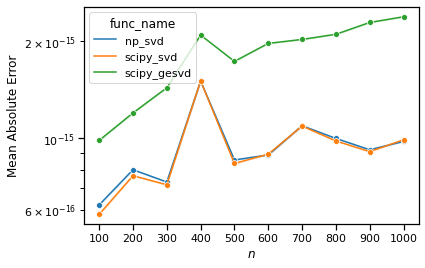

In [37]:
ax = sns.lineplot(x='N', y='Mean Absolute Error', hue='func_name',
                  marker='o',
                  data=Error_results11)
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

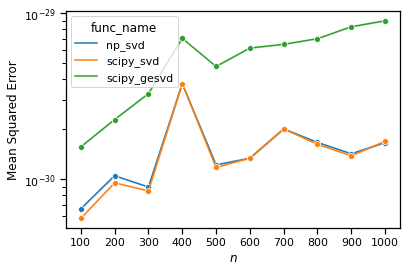

In [38]:
ax = sns.lineplot(x='N', y='Mean Squared Error', hue='func_name',
                  marker='o',
                  data=Error_results12)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

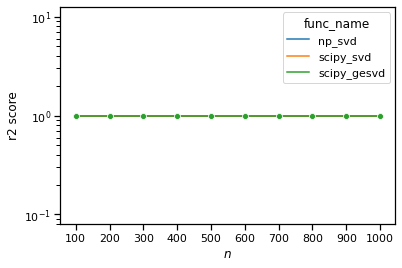

In [48]:
ax = sns.lineplot(x='N', y='r2 score', hue='func_name',
                  marker='o',
                  data=Error_results13)
ax.set_ylabel('r2 score')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

# Randomised SVD

In [140]:
def rsvd(A):
    rank=40
    Omega = np.random.randn(A.shape[1], rank)
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

In [144]:
results2 = time_svd_funcs([rsvd], 
                         Ns=[100,200,300,400,500,600,700,800,900,1000]
                        )

In [145]:
results2.groupby(['N', 'func_name']).agg([np.mean, np.std])

time          
                    mean       std
N    func_name                    
100  rsvd       0.003122  0.001326
200  rsvd       0.003539  0.000915
300  rsvd       0.003884  0.000102
400  rsvd       0.004616  0.000105
500  rsvd       0.005335  0.000127
600  rsvd       0.006197  0.000457
700  rsvd       0.006759  0.000130
800  rsvd       0.007506  0.000182
900  rsvd       0.008578  0.000125
1000 rsvd       0.009882  0.000913

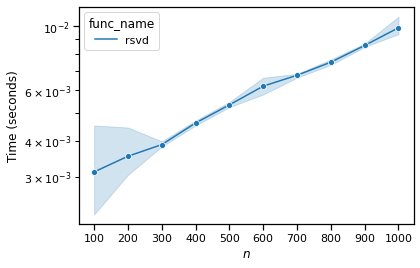

In [146]:
ax = sns.lineplot(x='N', y='time', hue='func_name',
                  marker='o',
                  data=results2)
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

In [32]:
Error_results21,Error_results22,Error_results23 = Error_svd_funcs([rsvd], 
                                                  Ns=[100,200,300,400,500,600,700,800,900,1000]
                                                  )

rsvd
rsvd
rsvd
rsvd
rsvd
rsvd
rsvd
rsvd
rsvd
rsvd


In [147]:
Error_results21.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Absolute Error          
                              mean       std
N    func_name                              
100  rsvd                 0.141520  0.001045
200  rsvd                 0.192769  0.000330
300  rsvd                 0.210793  0.001224
400  rsvd                 0.221405  0.000476
500  rsvd                 0.226561  0.000608
600  rsvd                 0.230299  0.000154
700  rsvd                 0.233723  0.000825
800  rsvd                 0.235753  0.000662
900  rsvd                 0.238035  0.000856
1000 rsvd                 0.239264  0.000457

In [148]:
Error_results22.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Squared Error          
                             mean       std
N    func_name                             
100  rsvd                0.031211  0.000527
200  rsvd                0.055022  0.000206
300  rsvd                0.064404  0.000880
400  rsvd                0.069886  0.000469
500  rsvd                0.072366  0.000423
600  rsvd                0.074171  0.000099
700  rsvd                0.076170  0.000781
800  rsvd                0.077104  0.000572
900  rsvd                0.078398  0.000772
1000 rsvd                0.078918  0.000416

In [149]:
Error_results23.groupby(['N', 'func_name']).agg([np.mean, np.std])

r2 score          
                    mean       std
N    func_name                    
100  rsvd       0.622096  0.006078
200  rsvd       0.337612  0.002515
300  rsvd       0.223227  0.010583
400  rsvd       0.163483  0.005710
500  rsvd       0.128995  0.005103
600  rsvd       0.107689  0.001212
700  rsvd       0.082630  0.009463
800  rsvd       0.073246  0.006858
900  rsvd       0.058097  0.009245
1000 rsvd       0.052416  0.004997

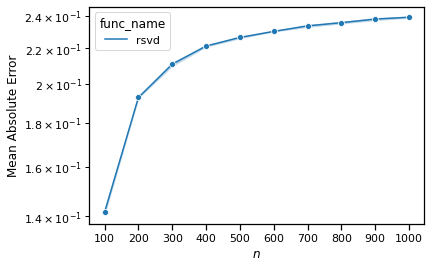

In [43]:
ax = sns.lineplot(x='N', y='Mean Absolute Error', hue='func_name',
                  marker='o',
                  data=Error_results21)
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

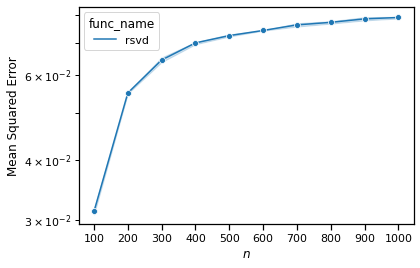

In [44]:
ax = sns.lineplot(x='N', y='Mean Squared Error', hue='func_name',
                  marker='o',
                  data=Error_results22)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


[(0.04319060417295573, 1)]

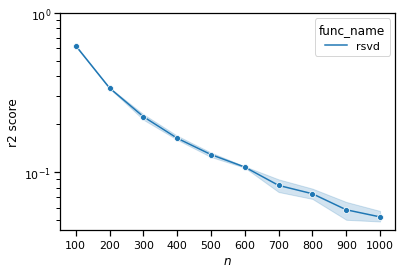

In [46]:
ax = sns.lineplot(x='N', y='r2 score', hue='func_name',
                  marker='o',
                  data=Error_results23)
ax.set_ylabel('r2 score')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))
ax.set(ylim=(0, 1))

# Sparse SVD

In [117]:
from scipy.sparse.linalg import svds

In [118]:
def sparse_svd(X):
    U, Sigma, Vt = svds(X) #k=6
    return U, Sigma, Vt

In [119]:
from scipy.sparse import random as sparse_random
X = sparse_random(100, 100, density=0.1, format='csr',random_state=42)
print(type(X))
X.shape

<class 'scipy.sparse.csr.csr_matrix'>


(100, 100)

In [120]:
print(X)

  (0, 0)	0.8385492070247931
  (0, 5)	0.8357830708546012
  (0, 31)	0.18801571719628896
  (0, 34)	0.7484063444050378
  (0, 49)	0.32413517383279633
  (0, 51)	0.1445797102395847
  (0, 61)	0.5650325249759498
  (0, 62)	0.5709915713259784
  (0, 63)	0.6273965553158464
  (0, 75)	0.8043047129555168
  (0, 80)	0.8344291199057423
  (0, 85)	0.29267144575942416
  (0, 91)	0.8808814237747367
  (0, 94)	0.5598553800344772
  (1, 1)	0.461925204205735
  (1, 15)	0.5824009648679398
  (1, 31)	0.44276495686189454
  (1, 35)	0.27404158970427583
  (1, 48)	0.41549339669591434
  (1, 60)	0.06917419050541718
  (1, 65)	0.983731853997006
  (1, 72)	0.8975621934531601
  (1, 73)	0.33646116257721226
  (1, 76)	0.6035857876582056
  (1, 78)	0.27479781076790055
  :	:
  (97, 15)	0.29854792598216395
  (97, 35)	0.2298063414226651
  (97, 43)	0.4015417380052825
  (97, 68)	0.8126126390881718
  (97, 69)	0.24756450814178466
  (97, 88)	0.8749394056026714
  (98, 14)	0.8418253643652626
  (98, 20)	0.7065498022828269
  (98, 24)	0.8878729318

In [121]:
from time import time

def time_func(func, n_trials, *args, **kwargs):
    times = []
    for i in range(n_trials):
        t0 = time()
        res = func(*args, **kwargs)
        tt = time()
        t = tt - t0
        times.append(t)
    return np.asarray(times)

def time_svd_funcs(funcs, Ns=[200, 500, 1000, 2000], n_trials=4):
    results = []
    for N in Ns:
        X=sparse_random(N, N, density=0.01, format='csr',random_state=42)
        for func in funcs:
            times = time_func(func, n_trials, X)
            
            results.extend([{
                'time': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in times])
    return pd.DataFrame(results)

In [135]:
results3 = time_svd_funcs([sparse_svd], 
                         Ns=[100,200,300,400,500,600,700,800,900,1000]
                        )

In [136]:
results3.groupby(['N', 'func_name']).agg([np.mean, np.std])

time          
                     mean       std
N    func_name                     
100  sparse_svd  0.004964  0.001806
200  sparse_svd  0.005197  0.000567
300  sparse_svd  0.005326  0.000249
400  sparse_svd  0.006755  0.000096
500  sparse_svd  0.010596  0.000490
600  sparse_svd  0.012238  0.000144
700  sparse_svd  0.015807  0.001910
800  sparse_svd  0.017681  0.001365
900  sparse_svd  0.020993  0.000269
1000 sparse_svd  0.024959  0.000216

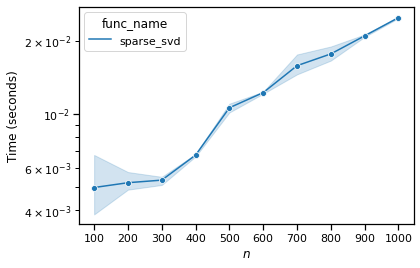

In [137]:
ax = sns.lineplot(x='N', y='time', hue='func_name',
                  marker='o',
                  data=results3)
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

In [125]:
def Error_func(func, n_trials,X,N):
    Error1= []
    Error2= []
    Error3= []
    print(func.__name__)
    for i in range(n_trials):
      U, sigma, Vt = func(X)
      sigma = np.diag(sigma)
      a4=np.dot(np.dot(U, sigma), Vt)
      Y=X.toarray()
      Error1.append(mean_absolute_error(Y,a4))
      Error2.append(mean_squared_error(Y,a4))
      Error3.append(r2_score(Y,a4))
    return np.asarray(Error1),np.asarray(Error2),np.asarray(Error3)

def Error_svd_funcs(funcs, Ns=[100,200,300,400,500,600,700,800,900,1000], n_trials=4):
    results1 = []
    results2=[]
    results3=[]
    for N in Ns:
        X=sparse_random(N, N, density=0.01, format='csr',random_state=42)
        for func in funcs:
            t1,t2,t4 = Error_func(func, n_trials, X,N)
            results1.extend([{
                'Mean Absolute Error': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t1])
            results2.extend([{
                'Mean Squared Error': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t2])
            results3.extend([{
                'r2 score': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t4])
            
    return pd.DataFrame(results1),pd.DataFrame(results2),pd.DataFrame(results3)

In [126]:
Error_results31,Error_results32,Error_results33 = Error_svd_funcs([sparse_svd], 
                                                  Ns=[100,200,300,400,500,600,700,800,900,1000]
                                                  )

sparse_svd
sparse_svd
sparse_svd
sparse_svd
sparse_svd
sparse_svd
sparse_svd
sparse_svd
sparse_svd
sparse_svd


In [127]:
Error_results31.groupby(['N', 'func_name']).agg([np.mean, np.std])


Mean Absolute Error              
                               mean           std
N    func_name                                   
100  sparse_svd            0.004233  4.589647e-18
200  sparse_svd            0.006231  2.325193e-16
300  sparse_svd            0.008200  4.249187e-18
400  sparse_svd            0.009802  3.616666e-17
500  sparse_svd            0.010385  4.697653e-18
600  sparse_svd            0.010332  1.734723e-18
700  sparse_svd            0.010951  8.258936e-18
800  sparse_svd            0.010798  1.734723e-18
900  sparse_svd            0.010755  3.747431e-18
1000 sparse_svd            0.010688  5.007715e-18

In [128]:
Error_results32.groupby(['N', 'func_name']).agg([np.mean, np.std])


Mean Squared Error              
                              mean           std
N    func_name                                  
100  sparse_svd           0.002395  0.000000e+00
200  sparse_svd           0.002528  2.503858e-19
300  sparse_svd           0.002943  3.540989e-19
400  sparse_svd           0.003130  0.000000e+00
500  sparse_svd           0.003158  3.540989e-19
600  sparse_svd           0.003184  4.336809e-19
700  sparse_svd           0.003196  0.000000e+00
800  sparse_svd           0.003228  0.000000e+00
900  sparse_svd           0.003196  3.540989e-19
1000 sparse_svd           0.003204  4.336809e-19

In [129]:
Error_results33.groupby(['N', 'func_name']).agg([np.mean, np.std])

r2 score              
                     mean           std
N    func_name                         
100  sparse_svd  0.461907  0.000000e+00
200  sparse_svd  0.173649  4.736102e-15
300  sparse_svd  0.105015  8.012345e-18
400  sparse_svd  0.046337  7.941927e-17
500  sparse_svd  0.041116  2.042755e-17
600  sparse_svd  0.032569  8.012345e-18
700  sparse_svd  0.028212  1.373247e-17
800  sparse_svd  0.022202  7.222230e-18
900  sparse_svd  0.020259  6.643485e-18
1000 sparse_svd  0.018836  6.938894e-18

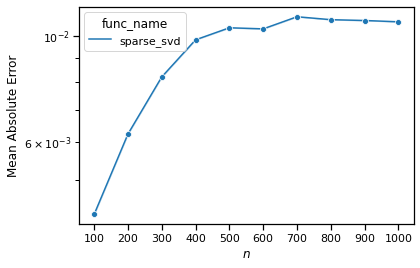

In [130]:
ax = sns.lineplot(x='N', y='Mean Absolute Error', hue='func_name',
                  marker='o',
                  data=Error_results31)
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

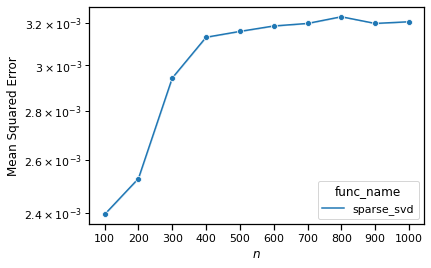

In [131]:
ax = sns.lineplot(x='N', y='Mean Squared Error', hue='func_name',
                  marker='o',
                  data=Error_results32)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


[(0.016051578254739393, 1)]

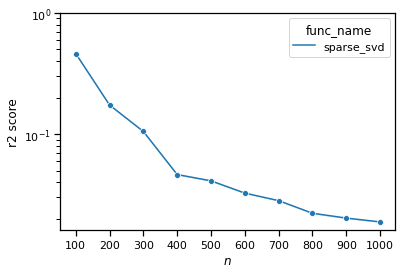

In [132]:
ax = sns.lineplot(x='N', y='r2 score', hue='func_name',
                  marker='o',
                  data=Error_results33)
ax.set_ylabel('r2 score')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))
ax.set(ylim=(0, 1))

# Funk SVD

In [86]:
def FunkSVD(a,n,lr,l,i):

  q = np.random.rand(n,l)
  r = np.random.rand(l,n)
  for i4 in range(i):
    for i in range(n):
      for j in range(n):
        difference = a[i, j] - np.dot(q[i, :], r[:, j])
        for k in range(l):
          q[i, k] += lr * (2*difference*r[k, j])
          r[k, j] += lr * (2*difference*q[i, k])
  return q,r

In [87]:
from time import time
result4=[]
result7=[]
l=[2,16,40,70]
a=np.random.rand(200,200)
for i in l:
  t0 = time()
  q,r = FunkSVD(a,200,0.01,i,7)
  tt = time()
  t = tt - t0
  result4.append(t)
  a4=q.dot(r)
  result7.append(sum(np.ravel(a-a4)))
  print(i)

2
16
40
70


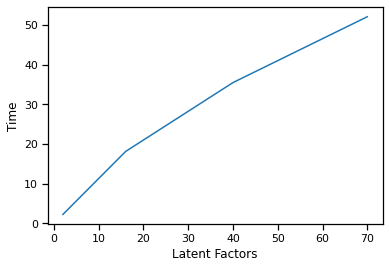

In [88]:
import matplotlib.pyplot as plt
  
plt.plot(l,result4)
#plt.title()
plt.xlabel('Latent Factors')
plt.ylabel('Time')
plt.show()

In [307]:
def FunkSVD(a,lr=0.002,l=10,iter=50):
  n=a.shape[0]
  print(n)
  q = np.random.rand(n,l)
  r = np.random.rand(l,n)
  for i4 in range(iter):
    for i in range(n):
      for j in range(n):
        if(a[i][j]!=0):
          difference = a[i, j] - np.dot(q[i, :], r[:, j])
          for k in range(l):
            q[i, k] += lr * (2*difference*r[k, j])
            r[k, j] += lr * (2*difference*q[i, k])
  return q,r

In [308]:

from time import time

def time_func(func, n_trials, *args, **kwargs):
    times = []
    for i in range(n_trials):
        t0 = time()
        res = func(*args, **kwargs)
        tt = time()
        t = tt - t0
        times.append(t)
    return np.asarray(times)

def time_svd_funcs(funcs, Ns=[200, 500, 1000, 2000], n_trials=4):
    results = []
    for N in Ns:
        X=np.random.rand(N,N)
        for func in funcs:
            times = time_func(func, n_trials, X)
            
            results.extend([{
                'time': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in times])
    return pd.DataFrame(results)

In [309]:
results4 = time_svd_funcs([FunkSVD], 
                         Ns=[100,200,300,400,500,600,700,800,900,1000],n_trials=2)

100
100
200
200
300
300
400
400
500
500
600
600
700
700
800
800
900
900
1000
1000


In [315]:
results4.groupby(['N', 'func_name']).agg([np.mean])

,,time
,,mean
N,func_name,
100,FunkSVD,8.730079
200,FunkSVD,35.492379
300,FunkSVD,79.492850
400,FunkSVD,142.433020
500,FunkSVD,221.338752
600,FunkSVD,325.697055
700,FunkSVD,440.086604
800,FunkSVD,572.582297


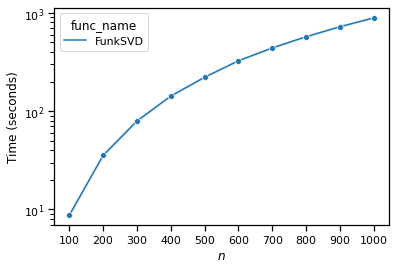

In [316]:
ax = sns.lineplot(x='N', y='time', hue='func_name',
                  marker='o',
                  data=results4)
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))


In [286]:
def r2_score_for_funk_svd(X,Y,Z,n,N):
  R=np.sum(np.square(np.abs(Y-X)))
  mean=np.sum(Y)/n
  D=np.ones((N,N))
  D=D*Z
  D=mean*D
  T=np.sum(np.square(np.abs(Y-D)))
  return 1-(R/T)

In [287]:
def Error_func(func, n_trials,X,N):
  Error1= []
  Error2= []
  Error3= []
  print(func.__name__)
  for i in range(n_trials):
    Q,R = func(X)
    a4=np.dot(Q,R)
    #print(X)
    Y=X.copy()
    Y=(Y>0)
    #Y.astype(float)
    #print(Y)
    #print(a4)
    #print("max before")
    #print(a4.max())
    a4=a4*Y
    #print(a4)
    #print("max")
    #print(a4.max())
    #Error1.append(mean_absolute_error(X,a4))
    #Error2.append(mean_squared_error(X,a4))
    #Error3.append(r2_score(X,a4))
    Result=np.abs(X-a4)
    error=np.sum(Result)
    Error1.append(error/(N*N*0.2))
    Result=np.square(np.abs(X-a4))
    error=np.sum(Result)
    Error2.append(error/(N*N*0.2))
    n=N*N*0.2
    Error3.append(r2_score_for_funk_svd(a4,X,Y,n,N))
  return np.asarray(Error1),np.asarray(Error2),np.asarray(Error3)




In [288]:
def Error_svd_funcs(funcs, Ns=[100,200,300,400,500,600,700,800,900,1000], n_trials=2):
    results1 = []
    results2=[]
    results3=[]
    for N in Ns:
        X=sparse_random(N, N, density=0.2, format='csr',random_state=42)
        X=X.toarray()
        for func in funcs:
            t1,t2,t4 = Error_func(func, n_trials, X,N)
            results1.extend([{
                'Mean Absolute Error': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t1])
            results2.extend([{
                'Mean Squared Error': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t2])
            results3.extend([{
                'r2 score': t, 
                'N': N,
                'func_name': func.__name__,
                } for t in t4])
            
    return pd.DataFrame(results1),pd.DataFrame(results2),pd.DataFrame(results3)

In [289]:
Error_results41,Error_results42,Error_results43 = Error_svd_funcs([FunkSVD], 
                                                  Ns=[100,200,300,400,500,600,700,800,900,1000]
                                                  )

FunkSVD
100
100
FunkSVD
200
200
FunkSVD
300
300
FunkSVD
400
400
FunkSVD
500
500
FunkSVD
600
600
FunkSVD
700
700
FunkSVD
800
800
FunkSVD
900
900
FunkSVD
1000
1000


In [290]:
Error_results41.groupby(['N', 'func_name']).agg([np.mean])

,,Mean Absolute Error
,,mean
N,func_name,
100,FunkSVD,0.216762
200,FunkSVD,0.225323
300,FunkSVD,0.226516
400,FunkSVD,0.230928
500,FunkSVD,0.232930
600,FunkSVD,0.234304
700,FunkSVD,0.235681
800,FunkSVD,0.236417


In [291]:
Error_results42.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Squared Error          
                             mean       std
N    func_name                             
100  FunkSVD             0.069599  0.000932
200  FunkSVD             0.072412  0.000820
300  FunkSVD             0.072279  0.000035
400  FunkSVD             0.074272  0.000451
500  FunkSVD             0.074983  0.000135
600  FunkSVD             0.075363  0.000129
700  FunkSVD             0.076234  0.000050
800  FunkSVD             0.076429  0.000085
900  FunkSVD             0.076961  0.000071
1000 FunkSVD             0.077600  0.000137

In [292]:
Error_results43.groupby(['N', 'func_name']).agg([np.mean, np.std])

r2 score          
                    mean       std
N    func_name                    
100  FunkSVD    0.166817  0.011155
200  FunkSVD    0.131735  0.009826
300  FunkSVD    0.124049  0.000428
400  FunkSVD    0.109503  0.005402
500  FunkSVD    0.101003  0.001623
600  FunkSVD    0.094006  0.001546
700  FunkSVD    0.085759  0.000599
800  FunkSVD    0.080045  0.001017
900  FunkSVD    0.074326  0.000858
1000 FunkSVD    0.070543  0.001645

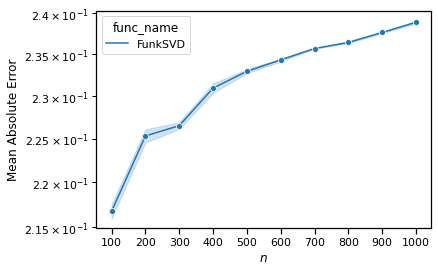

In [293]:
ax = sns.lineplot(x='N', y='Mean Absolute Error', hue='func_name',
                  marker='o',
                  data=Error_results41)
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

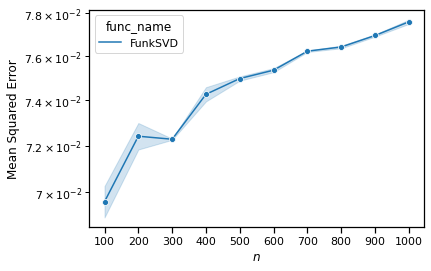

In [294]:
ax = sns.lineplot(x='N', y='Mean Squared Error', hue='func_name',
                  marker='o',
                  data=Error_results42)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

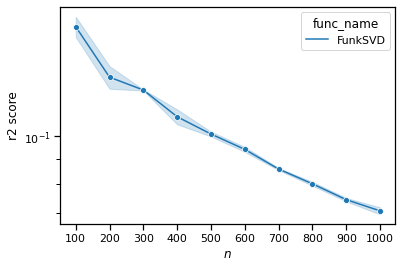

In [295]:
ax = sns.lineplot(x='N', y='r2 score', hue='func_name',
                  marker='o',
                  data=Error_results43)
ax.set_ylabel('r2 score')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))
#ax.set(ylim=(0, 1))

# Comparitive graphs

In [317]:
time=pd.concat([results1,results2,results3,results4])

In [296]:
abs_err=pd.concat([Error_results11,Error_results21,Error_results31,Error_results41])

In [297]:
mse=pd.concat([Error_results12,Error_results22,Error_results32,Error_results42])

In [298]:
r2=pd.concat([Error_results13,Error_results23,Error_results33,Error_results43])

In [318]:
time.groupby(['N', 'func_name']).agg([np.mean, np.std])

time          
                        mean       std
N    func_name                        
100  FunkSVD        8.730079  0.061402
     np_svd         0.008784  0.009507
     rsvd           0.003122  0.001326
     scipy_gesvd    0.018140  0.001694
     scipy_svd      0.012987  0.010323
     sparse_svd     0.004964  0.001806
200  FunkSVD       35.492379  0.363486
     np_svd         0.030509  0.003867
     rsvd           0.003539  0.000915
     scipy_gesvd    0.057421  0.004020
     scipy_svd      0.028477  0.001016
     sparse_svd     0.005197  0.000567
300  FunkSVD       79.492850  1.062156
     np_svd         0.042570  0.015915
     rsvd           0.003884  0.000102
     scipy_gesvd    0.167098  0.002123
     scipy_svd      0.043048  0.012894
     sparse_svd     0.005326  0.000249
400  FunkSVD      142.433020  0.357876
     np_svd         0.064424  0.003176
     rsvd           0.004616  0.000105
     scipy_gesvd    0.323157  0.003109
     scipy_svd      0.076110  0.027926
     sparse_svd     0.006755  0.000096
500  FunkSVD      221.338752  0.882581
     np_svd         0.107477  0.002701
     rsvd           0.005335  0.000127
     scipy_gesvd    0.543536  0.007627
     scipy_svd      0.120859  0.029607
     sparse_svd     0.010596  0.000490
600  FunkSVD      325.697055  0.561742
     np_svd         0.174104  0.003728
     rsvd           0.006197  0.000457
     scipy_gesvd    0.907309  0.006023
     scipy_svd      0.187179  0.028282
     sparse_svd     0.012238  0.000144
700  FunkSVD      440.086604  2.665048
     np_svd         0.264472  0.008277
     rsvd           0.006759  0.000130
     scipy_gesvd    1.333437  0.093693
     scipy_svd      0.279574  0.014870
     sparse_svd     0.015807  0.001910
800  FunkSVD      572.582297  3.439730
     np_svd         0.369526  0.015021
     rsvd           0.007506  0.000182
     scipy_gesvd    2.040285  0.008398
     scipy_svd      0.395934  0.017905
     sparse_svd     0.017681  0.001365
900  FunkSVD      723.633752  4.983374
     np_svd         0.516449  0.009098
     rsvd           0.008578  0.000125
     scipy_gesvd    2.853727  0.019025
     scipy_svd      0.537257  0.020852
     sparse_svd     0.020993  0.000269
1000 FunkSVD      890.235441  3.237052
     np_svd         0.665216  0.014137
     rsvd           0.009882  0.000913
     scipy_gesvd    3.763049  0.527240
     scipy_svd      0.724497  0.019926
     sparse_svd     0.024959  0.000216

In [300]:
abs_err.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Absolute Error              
                                mean           std
N    func_name                                    
100  FunkSVD            2.167616e-01  1.120037e-03
     np_svd             6.212374e-16  0.000000e+00
     rsvd               1.415196e-01  1.045009e-03
     scipy_gesvd        9.848502e-16  0.000000e+00
     scipy_svd          5.803830e-16  0.000000e+00
     sparse_svd         4.233369e-03  4.589647e-18
200  FunkSVD            2.253232e-01  1.083317e-03
     np_svd             7.988957e-16  0.000000e+00
     rsvd               1.927694e-01  3.303142e-04
     scipy_gesvd        1.198859e-15  0.000000e+00
     scipy_svd          7.654988e-16  0.000000e+00
     sparse_svd         6.230911e-03  2.325193e-16
300  FunkSVD            2.265156e-01  5.525125e-04
     np_svd             7.317031e-16  0.000000e+00
     rsvd               2.107933e-01  1.224059e-03
     scipy_gesvd        1.434781e-15  0.000000e+00
     scipy_svd          7.173420e-16  0.000000e+00
     sparse_svd         8.200194e-03  4.249187e-18
400  FunkSVD            2.309280e-01  7.965702e-04
     np_svd             1.504870e-15  0.000000e+00
     rsvd               2.214048e-01  4.763153e-04
     scipy_gesvd        2.091780e-15  0.000000e+00
     scipy_svd          1.507345e-15  0.000000e+00
     sparse_svd         9.801931e-03  3.616666e-17
500  FunkSVD            2.329304e-01  3.184512e-04
     np_svd             8.566730e-16  0.000000e+00
     rsvd               2.265612e-01  6.076781e-04
     scipy_gesvd        1.732865e-15  0.000000e+00
     scipy_svd          8.352035e-16  0.000000e+00
     sparse_svd         1.038544e-02  4.697653e-18
600  FunkSVD            2.343044e-01  2.514413e-04
     np_svd             8.878091e-16  0.000000e+00
     rsvd               2.302992e-01  1.536432e-04
     scipy_gesvd        1.970411e-15  0.000000e+00
     scipy_svd          8.928715e-16  0.000000e+00
     sparse_svd         1.033156e-02  1.734723e-18
700  FunkSVD            2.356806e-01  3.152952e-05
     np_svd             1.094007e-15  0.000000e+00
     rsvd               2.337226e-01  8.245593e-04
     scipy_gesvd        2.027133e-15  0.000000e+00
     scipy_svd          1.091542e-15  0.000000e+00
     sparse_svd         1.095131e-02  8.258936e-18
800  FunkSVD            2.364167e-01  1.398919e-04
     np_svd             9.991100e-16  0.000000e+00
     rsvd               2.357531e-01  6.623526e-04
     scipy_gesvd        2.102932e-15  0.000000e+00
     scipy_svd          9.811871e-16  0.000000e+00
     sparse_svd         1.079782e-02  1.734723e-18
900  FunkSVD            2.376315e-01  1.082569e-04
     np_svd             9.212979e-16  0.000000e+00
     rsvd               2.380352e-01  8.559100e-04
     scipy_gesvd        2.288454e-15  0.000000e+00
     scipy_svd          9.091464e-16  0.000000e+00
     sparse_svd         1.075520e-02  3.747431e-18
1000 FunkSVD            2.388808e-01  2.668187e-04
     np_svd             9.780173e-16  0.000000e+00
     rsvd               2.392638e-01  4.573528e-04
     scipy_gesvd        2.383482e-15  0.000000e+00
     scipy_svd          9.893995e-16  0.000000e+00
     sparse_svd         1.068800e-02  5.007715e-18

In [301]:
mse.groupby(['N', 'func_name']).agg([np.mean, np.std])

Mean Squared Error              
                               mean           std
N    func_name                                   
100  FunkSVD           6.959918e-02  9.318424e-04
     np_svd            6.610648e-31  0.000000e+00
     rsvd              3.121133e-02  5.272564e-04
     scipy_gesvd       1.562913e-30  0.000000e+00
     scipy_svd         5.783383e-31  0.000000e+00
     sparse_svd        2.394657e-03  0.000000e+00
200  FunkSVD           7.241155e-02  8.195026e-04
     np_svd            1.047197e-30  0.000000e+00
     rsvd              5.502189e-02  2.060451e-04
     scipy_gesvd       2.282326e-30  0.000000e+00
     scipy_svd         9.480807e-31  0.000000e+00
     sparse_svd        2.528225e-03  2.503858e-19
300  FunkSVD           7.227892e-02  3.531530e-05
     np_svd            8.944048e-31  0.000000e+00
     rsvd              6.440427e-02  8.802044e-04
     scipy_gesvd       3.269606e-30  0.000000e+00
     scipy_svd         8.477762e-31  0.000000e+00
     sparse_svd        2.943006e-03  3.540989e-19
400  FunkSVD           7.427177e-02  4.505591e-04
     np_svd            3.757638e-30  0.000000e+00
     rsvd              6.988619e-02  4.686858e-04
     scipy_gesvd       7.051988e-30  0.000000e+00
     scipy_svd         3.758875e-30  0.000000e+00
     sparse_svd        3.129955e-03  0.000000e+00
500  FunkSVD           7.498271e-02  1.353649e-04
     np_svd            1.217197e-30  0.000000e+00
     rsvd              7.236557e-02  4.230335e-04
     scipy_gesvd       4.771595e-30  0.000000e+00
     scipy_svd         1.173380e-30  0.000000e+00
     sparse_svd        3.157803e-03  3.540989e-19
600  FunkSVD           7.536299e-02  1.285895e-04
     np_svd            1.334665e-30  0.000000e+00
     rsvd              7.417125e-02  9.914733e-05
     scipy_gesvd       6.159182e-30  0.000000e+00
     scipy_svd         1.337645e-30  0.000000e+00
     sparse_svd        3.183756e-03  4.336809e-19
700  FunkSVD           7.623382e-02  4.992098e-05
     np_svd            2.004985e-30  0.000000e+00
     rsvd              7.616984e-02  7.812681e-04
     scipy_gesvd       6.489638e-30  0.000000e+00
     scipy_svd         2.005073e-30  0.000000e+00
     sparse_svd        3.195947e-03  0.000000e+00
800  FunkSVD           7.642877e-02  8.451230e-05
     np_svd            1.661732e-30  0.000000e+00
     rsvd              7.710372e-02  5.716181e-04
     scipy_gesvd       7.015813e-30  0.000000e+00
     scipy_svd         1.618051e-30  0.000000e+00
     sparse_svd        3.228476e-03  0.000000e+00
900  FunkSVD           7.696082e-02  7.132484e-05
     np_svd            1.419437e-30  0.000000e+00
     rsvd              7.839824e-02  7.715279e-04
     scipy_gesvd       8.281922e-30  0.000000e+00
     scipy_svd         1.380187e-30  0.000000e+00
     sparse_svd        3.196007e-03  3.540989e-19
1000 FunkSVD           7.760021e-02  1.373603e-04
     np_svd            1.658927e-30  0.000000e+00
     rsvd              7.891841e-02  4.156392e-04
     scipy_gesvd       8.996637e-30  0.000000e+00
     scipy_svd         1.688520e-30  0.000000e+00
     sparse_svd        3.204151e-03  4.336809e-19

In [302]:
r2.groupby(['N', 'func_name']).agg([np.mean, np.std])

r2 score              
                      mean           std
N    func_name                          
100  FunkSVD      0.166817  1.115524e-02
     np_svd       1.000000  0.000000e+00
     rsvd         0.622096  6.078013e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.461907  0.000000e+00
200  FunkSVD      0.131735  9.826402e-03
     np_svd       1.000000  0.000000e+00
     rsvd         0.337612  2.514567e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.173649  4.736102e-15
300  FunkSVD      0.124049  4.279873e-04
     np_svd       1.000000  0.000000e+00
     rsvd         0.223227  1.058301e-02
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.105015  8.012345e-18
400  FunkSVD      0.109503  5.402074e-03
     np_svd       1.000000  0.000000e+00
     rsvd         0.163483  5.709996e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.046337  7.941927e-17
500  FunkSVD      0.101003  1.622942e-03
     np_svd       1.000000  0.000000e+00
     rsvd         0.128995  5.102793e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.041116  2.042755e-17
600  FunkSVD      0.094006  1.545869e-03
     np_svd       1.000000  0.000000e+00
     rsvd         0.107689  1.211998e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.032569  8.012345e-18
700  FunkSVD      0.085759  5.986819e-04
     np_svd       1.000000  0.000000e+00
     rsvd         0.082630  9.462515e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.028212  1.373247e-17
800  FunkSVD      0.080045  1.017254e-03
     np_svd       1.000000  0.000000e+00
     rsvd         0.073246  6.858305e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.022202  7.222230e-18
900  FunkSVD      0.074326  8.578848e-04
     np_svd       1.000000  0.000000e+00
     rsvd         0.058097  9.244596e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.020259  6.643485e-18
1000 FunkSVD      0.070543  1.645233e-03
     np_svd       1.000000  0.000000e+00
     rsvd         0.052416  4.996508e-03
     scipy_gesvd  1.000000  0.000000e+00
     scipy_svd    1.000000  0.000000e+00
     sparse_svd   0.018836  6.938894e-18

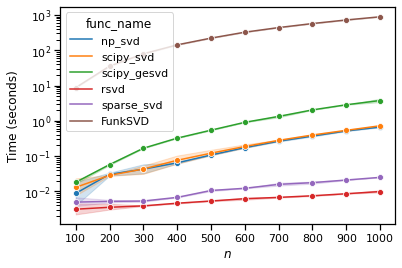

In [319]:
ax = sns.lineplot(x='N', y='time', hue='func_name',
                  marker='o',
                  data=time)
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

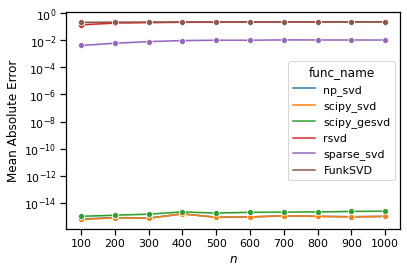

In [304]:
ax = sns.lineplot(x='N', y='Mean Absolute Error', hue='func_name',
                  marker='o',
                  data=abs_err)
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

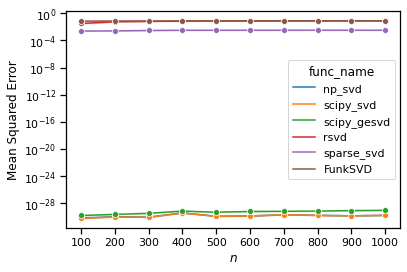

In [305]:
ax = sns.lineplot(x='N', y='Mean Squared Error', hue='func_name',
                  marker='o',
                  data=mse)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))

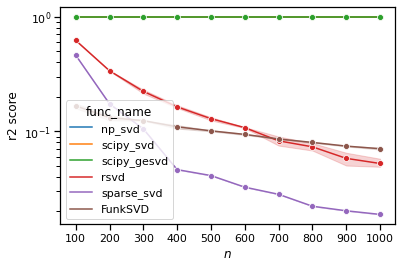

In [306]:
ax = sns.lineplot(x='N', y='r2 score', hue='func_name',
                  marker='o',
                  data=r2)
ax.set_ylabel('r2 score')
ax.set_xlabel('$n$')
ax.set_yscale('log')
ax.set_xticks(np.arange(100,1100,100))